# Cricket Data Exploration 

### Table of Contents
1. Introduction  
    1.1. A very brief summary of cricket  
    1.2. Data sources  
2. Data Exploration  
    2.1. How many matches of each type?  
    2.2. When were these matches played?  
    2.3. Which teams play the most matches?
    2.4. Venues holding the most matches  
3. ...

## 1. Introduction
In teaching myself Python, I am practising data exploration and, in future notebooks, further analysis of cricket data. In this notebook I explore the http://cricsheet.org/ data, creating plots and useable Pandas DataFrames.

### 1.1. A very brief summary of cricket  
A cricket match is played between two teams, each with 11 players. Batting occurs on the rectangular pitch at the center of the field, while fielders cover the rest of the fielding area. Comparison of cricket field with baseball field.   

[<img src="Images/CricketBaseballBasic.png" width=600>](https://en.wikipedia.org/wiki/Comparison_of_baseball_and_cricket)

The batters aim to score as many runs as possible by running between each end of the pitch or hitting the ball over the field boundary. A team keeps batting until 10 of the 11 players are out or the maximum number of overs is reached (an over is a set of 6 balls bowled), at which point the 'innings' is over and the teams switch.  

There are three primary forms of cricket, each of which are represented in this dataset:
- **Test matches:** Test matches are considered the highest form of cricket. They have a maximum duration of 5 days, with 8 hours of play per day, and generally run between 3-5 days. Each team alternately plays two innings, with each innings lasting until ten wickets are taken or the batting team declares (typically 80-100 overs). The International Cricket Council (ICC) is cricket's international governing body and grants teams with "Test cricket status" (currently only 10 of the 106 ICC teams have Test cricket status), permitting them to play Test cricket. Thus, a game played between any two teams with "Test cricket status" is considered a Test match.
- **One Day International (ODI) matches:** One Day International matches are a form of "limited over cricket", played for the first time in the 1970's. ODI matches can be completed in 7-8 hours as each team plays only one inning each, with not more than 50 overs per innings. As with Test matches, the ICC grants teams with "ODI status" (currently only 16 teams have ODI status), permitting them to play ODI matches. Thus, a game played between any two teams with "ODI status" is considered an ODI.
- **Twenty20 (T20) International matches:** Twenty20 International matches are a more recent form of "limited over cricket", first officially played in 2005. Twenty20 matches can be completed in 2-3 hours with each team playing one innings each, comprising not more than 20 overs per innings. In this dataset, the match type 'T20' represents matches recognized by the ICC as Twenty20 International matches, which are typically matches between teams that have been granted "T20 status" by the ICC (currently only 18 teams have T20 status).

There are currently 106 teams that form the ICC, but only 10-20 of these teams have Test cricket, ODI and/or T20 status. Other matches played between teams without "status" have also been included in the http://cricsheet.org/ dataset under separate labels:
- **Multi-Day Matches (MDM):** Since not all teams have been granted "Test cricket status", multi-day matches played where one or, more commonly, both teams do not have "Test cricket status" (e.g. the ICC Intercontinental Cup) have been recorded as "Multi-day matches". 
- **One Day Matches (ODM):** Since not all teams have been granted "ODI status", ODI-style matches played where one or, more commonly, both teams do not have "ODI status" have been recorded as One Day Matches (ODMs).    
- ** International Twenty20 (IT20) matches:** This match type covers all other T20 style matches, which are not considered "Twenty20 International" matches by the ICC. This group includes T20 style matches held between teams without "T20 status".
- **Indian Premier League (IPL) matches:** Leading domestic T20 competition contested by franchise teams with links to Indian cities. Teams are comprised of both domestic and international stars, with no more than four internationals allowed in the starting XI for a team in any given match.


### 1.2. Data Source / information  
The data used in this notebook has been taken from http://cricsheet.org/downloads/all.zip, a website that provides freely-available, structured ball-by-ball data for international and IPL cricket matches.  

I downloaded the data on 8th February 2016, at which point http://cricsheet.org/ had "ball-by-ball information for 2,702 matches, comprising 340 Test matches, 1,161 One-day internationals, 125 other one-day matches, 454 T20 internationals, 103 international T20s, and 517 IPL matches, featuring 51 countries, 11 IPL teams, and 2 representative XIs going back as far as 2005."  

## 2. Data Exploration
The data is in YAML format and so I use the yaml, os and glob modules to extract the information into a list, with each list entry representing a single match. Printing the first match data, we can see information including the type and location of the match, the teams playing and the outcome as well as ball-by-ball scoring data. 

In [117]:
import yaml 
import os
import glob

data_paths = glob.glob(str(os.path.join('Data', '*.yaml')))
matches = []

for path in data_paths:
    with open(path, 'r') as stream:
        matches.append(yaml.load(stream))

print matches[0]

{'info': {'city': 'Southampton', 'dates': [datetime.date(2005, 6, 13)], 'match_type': 'T20', 'toss': {'decision': 'bat', 'winner': 'England'}, 'venue': 'The Rose Bowl', 'teams': ['England', 'Australia'], 'umpires': ['NJ Llong', 'JW Lloyds'], 'player_of_match': ['KP Pietersen'], 'outcome': {'winner': 'England', 'by': {'runs': 100}}, 'overs': 20}, 'innings': [{'1st innings': {'deliveries': [{0.1: {'batsman': 'ME Trescothick', 'bowler': 'B Lee', 'runs': {'batsman': 0, 'total': 0, 'extras': 0}, 'non_striker': 'GO Jones'}}, {0.2: {'batsman': 'ME Trescothick', 'bowler': 'B Lee', 'runs': {'batsman': 1, 'total': 1, 'extras': 0}, 'non_striker': 'GO Jones'}}, {0.3: {'batsman': 'GO Jones', 'bowler': 'B Lee', 'runs': {'batsman': 0, 'total': 0, 'extras': 0}, 'non_striker': 'ME Trescothick'}}, {0.4: {'batsman': 'GO Jones', 'bowler': 'B Lee', 'runs': {'batsman': 0, 'total': 0, 'extras': 0}, 'non_striker': 'ME Trescothick'}}, {0.5: {'batsman': 'GO Jones', 'bowler': 'B Lee', 'runs': {'batsman': 0, 'tot

### 2.1. How many matches of each type? 
Let's start with confirming how many games of each type are recorded in this dataset. In order to do this, I want to extract the match type for each game. Given IPL matches have been recorded as a subset of the T20 match type, I also need to check each game for the presence of the key "competition", which indicates an IPL match.

While I am at it, I will also extract the dates on which these matches were played. For test and other multi-day matches, I only want the day the match started, but I'll also record the number of days the match lasted by counting the number of dates listed for each match. And rather than continuing to use lists, I will collate all my extracted data into a single Pandas DataFrame, called *cricket_df*. I will continue to add to this dataframe as I extract further information.

In [540]:
match_types = []
match_dates_raw = []
row = 0

for match in matches:
    if "competition" in matches[row]["info"]:
        match_types.append(matches[row]["info"]["competition"])
        match_dates_raw.append(matches[row]["info"]["dates"])
        row += 1
    else:
        match_types.append(matches[row]["info"]["match_type"])
        match_dates_raw.append(matches[row]["info"]["dates"])
        row += 1

match_dates = [dates[0] for dates in match_dates_raw]
day_count = [len(dates) for dates in match_dates_raw]

# Let's put this information into a pandas dataframe...
import pandas as pd

cricket_df = pd.DataFrame(data = zip(match_types, match_dates, day_count), 
                          columns = ["Match Type", "Starting Date", "No. of days"])
cricket_df["Starting Date"] = pd.to_datetime(cricket_df["Starting Date"])
cricket_df[:10]

,Match Type,Starting Date,No. of days
0,T20,2005-06-13,1
1,T20,2005-02-17,1
2,T20,2005-10-21,1
3,ODI,2006-06-13,1
4,ODI,2006-08-30,1
5,ODI,2006-09-02,1
6,ODI,2006-09-05,1
7,ODI,2006-09-08,1
8,ODI,2006-09-10,1
9,ODI,2006-06-17,1


I'll import the Counter tool from the collections module to then count the number of each match type and use this match_counter object to create a bar graph.

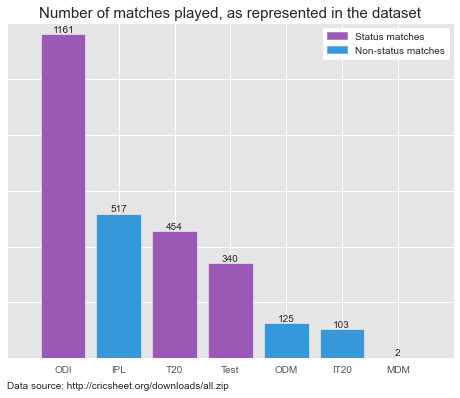

In [541]:
from collections import Counter
match_counter = Counter(match_types).most_common()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
   
plt.figure(figsize = (8, 6)) 
plt.style.use('ggplot')
ax = plt.subplot(111)              

# Chart data
match_keys = [x[0] for x in match_counter]
X = np.arange(len(set(match_types)))
Y = [x[1] for x in match_counter]

plt.bar(X, Y, align = 'center', edgecolor = 'white', 
        color = ['#9b59b6', '#3498db', '#9b59b6', '#9b59b6', '#3498db', '#3498db', '#3498db'])
for x,y in zip(X,Y):
    plt.text(x, y + 0.2, '%.0f' % y, fontsize = 10, ha = 'center', va = 'bottom')
       
# Chart title, axis labels, notes
plt.text(3, 1220, "Number of matches played, as represented in the dataset", fontsize = 15, ha = "center")     
plt.text(-1, -110, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10) 
plt.xticks(X, match_keys, fontsize = 10)
ax.set_yticklabels([])

# Legend
status = mpatches.Patch(color = '#9b59b6', label = 'Status matches')
nonstatus = mpatches.Patch(color = '#3498db', label = 'Non-status matches')
legend = plt.legend(handles = [status, nonstatus], frameon = 1)
frame = legend.get_frame() # .set_alpha(0.8)
frame.set_facecolor('white')

plt.show()

For lack of a better description, I've labelled the Test, ODI and T20I matches as "status" matches, where teams are required to be granted "status" by the ICC to play. 

This plot demonstrates that the number of extracted matches equals the number of matches and match types quoted by http://cricsheet.org/ at the time of download, so that's a great first step. It also shows us there are a large number of ODI-style and T20-style matches in comparison to test matches. However, this could be considered somewhat misleading as Test, ODI and T20 style matches have different lengths. While there are relatively fewer test matches played, Test matches run approximately 4 times longer than ODI-style matches. We can adjust this plot to instead represent the approximate number of days by:
- **Test/MDM:** Multi-day matches generally run for 3-5 days. To get the approximate number of days played, let's multiplying the number of matches by the average number of days played (as calculated by the dataset).
- **ODI/ODM:** Given one day matches run for 7-8 hours (i.e. 1 day), the number of matches can be considered the same as the number of days played.
- **T20 style:** Given T20 style matches run for 2-3 hours, we can multiply by the number of matches by 0.5.

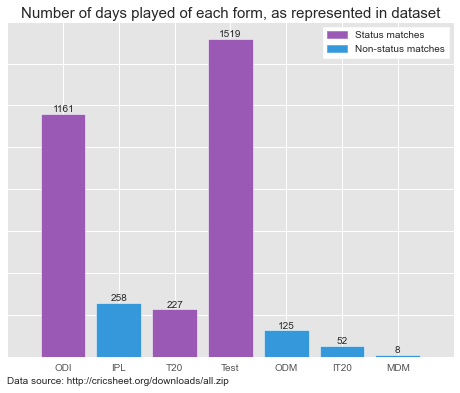

In [542]:
# Calculating the average number of days played for Test and MDMs
test_matches = cricket_df[cricket_df['Match Type'] == 'Test']
ave_test_length = np.mean(test_matches['No. of days'])
mdm_matches = cricket_df[cricket_df["Match Type"] == 'MDM']
ave_mdm_length = np.mean(mdm_matches['No. of days'])

# Convert counter object to a Pandas DataFrame and modify count to represent number of days played
counter_df = pd.DataFrame(data = Y, index = match_keys, columns = ['Count'])
counter_df.ix['Test', 'Count'] = counter_df.ix['Test', 'Count'] * ave_test_length
counter_df.ix['MDM', 'Count'] = counter_df.ix['MDM', 'Count'] * ave_mdm_length
counter_df.ix['IT20', 'Count'] = counter_df.ix['IT20', 'Count'] * 0.5
counter_df.ix['T20', 'Count'] = counter_df.ix['T20', 'Count'] * 0.5
counter_df.ix['IPL', 'Count'] = counter_df.ix['IPL', 'Count'] * 0.5

plt.figure(figsize = (8, 6)) 
ax = plt.subplot(111)              

# Chart data
match_keys = [x[0] for x in match_counter]
X = np.arange(len(set(match_types)))
Y = counter_df['Count']

plt.bar(X, Y, align = 'center', edgecolor = 'white', 
        color = ['#9b59b6', '#3498db', '#9b59b6', '#9b59b6', '#3498db', '#3498db', '#3498db'])
for x,y in zip(X,Y):
    plt.text(x, y + 0.2, '%.0f' % y, fontsize = 10, ha = 'center', va = 'bottom')
       
# Chart title, axis labels, notes
plt.text(3, 1620, "Number of days played of each form, as represented in dataset", fontsize = 15, ha = "center")     
plt.text(-1, -130, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10) 
plt.xticks(X, match_keys, fontsize = 10)
ax.set_yticklabels([])

# Legend
status = mpatches.Patch(color = '#9b59b6', label = 'Status matches')
nonstatus = mpatches.Patch(color = '#3498db', label = 'Non-status matches')
legend = plt.legend(handles = [status, nonstatus], frameon = 1)
frame = legend.get_frame() # .set_alpha(0.8)
frame.set_facecolor('white')

plt.show()

This plot more clearly shows in terms of the (approximate) number of days played, most cricket in this dataset is played in Test match form.

Just to see the ratio of "status" to "non-status" matches in a different way, I've created two additional plots, showing the ratio of status to non-status matches of each form (i.e. test, ODI, T20) and the ratio of status to non-status matches as a whole in the dataset.

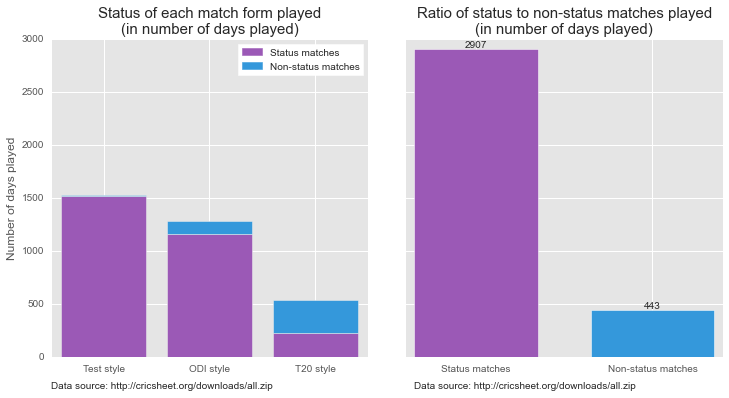

In [543]:
fig, axs = plt.subplots(ncols = 2, figsize = (10, 5))
fig.tight_layout()

## Plot 1
# Chart data
width = 0.8
status_matches = [counter_df.ix['Test', 'Count'], counter_df.ix['ODI', 'Count'], counter_df.ix['T20', 'Count']]
nonstatus_matches = [counter_df.ix['MDM', 'Count'], counter_df.ix['ODM', 'Count'], 
                     counter_df.ix['IT20', 'Count'] + counter_df.ix['IPL', 'Count']]
X = np.arange(3)
x_ticks = ['Test style', 'ODI style', 'T20 style']
        
axs[0].bar(X, status_matches, width, color = '#9b59b6', align = 'center', label = 'Status matches')
axs[0].bar(X, nonstatus_matches, width, color = '#3498db', align = 'center', label = 'Non-status matches', 
       bottom = status_matches)
       
# Chart title, axis labels, notes
axs[0].text(1, 3050, "Status of each match form played \n(in number of days played)", 
            fontsize = 15, ha = "center")     
axs[0].text(-0.5, -300, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10) 
axs[0].set_xticks(X)
axs[0].set_xticklabels(x_ticks, fontsize = 10)
axs[0].set_ylim(0, 3000)
axs[0].set_ylabel('Number of days played')

# Legend
ss = mpatches.Patch(color = '#9b59b6', label = 'Status matches')
ns = mpatches.Patch(color = '#3498db', label = 'Non-status matches')
legend = axs[0].legend(handles = [ss, ns], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

## Plot 2
# Chart data
match_keys = ['Status matches', 'Non-status matches']
X = np.arange(2)
Y = [sum(status_matches), sum(nonstatus_matches)]

axs[1].bar(X, Y, align = 'center', width = 0.7, edgecolor = 'white', color = ['#9b59b6', '#3498db'])
for x,y in zip(X,Y):
    plt.text(x, y + 0.2, '%.0f' % y, fontsize = 10, ha = 'center', va = 'bottom')
    
# Chart title, axis labels, notes
axs[1].text(0.5, 3050, "Ratio of status to non-status matches played \n(in number of days played)", 
            fontsize = 15, ha = "center")     
axs[1].text(-0.35, -300, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10) 
axs[1].set_xticks(X)
axs[1].set_xticklabels(match_keys, fontsize = 10)
axs[1].set_ylim(0, 3000)
axs[1].set_yticklabels([])

plt.show()

### 2.2. When were these matches played?
At the time of download, the dataset covered the period from 2005 to early February 2016. Let's take a look at when these matches were played within this time frame. This will allow us to take a look at coverage - that is, whether all the matches played since 2005 have been included in the dataset.

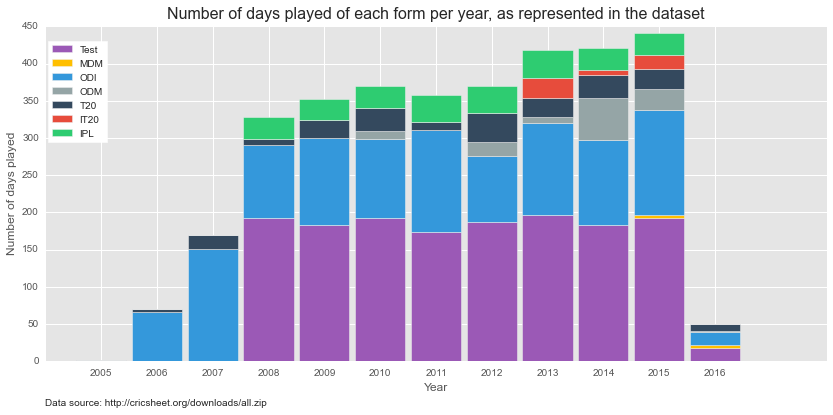

In [544]:
# Create a sub-dataframe for this plot, group by match type and year during which match was played
years = cricket_df["Starting Date"].dt.year
df = pd.DataFrame(data = zip(match_types, years), columns = ["Match Type", "Year"])
plt_data = df.groupby(["Match Type", "Year"]).size().reset_index(name = "Count")

plt.figure(figsize = (14, 6))

# Chart data: multiply multi-day matches by average length and T20s by 0.5
palette = ['#9b59b6', '#FFBF00', '#3498db', '#95a5a6', '#34495e', '#e74c3c', '#2ecc71']
width = 0.9
ipl_raw = [0] * 3 + plt_data["Count"][:8].tolist() + [0]
ipl = [i * 0.5 for i in ipl_raw]
it20_raw = [0] * 8 + plt_data["Count"][8:11].tolist() + [0]
it20 = [i * 0.5 for i in it20_raw]
mdm_raw = [0] * 10 + plt_data["Count"][11:13].tolist()
mdm = [i * ave_mdm_length for i in mdm_raw]
odi = [0] + plt_data["Count"][13:24].tolist()
odm = [0] * 5 + plt_data["Count"][24:25].tolist() + [0] + plt_data["Count"][25:30].tolist()
t20_raw = plt_data["Count"][30:42].tolist()
t20 = [i * 0.5 for i in t20_raw]
test_raw = [0] * 3 + plt_data["Count"][42:].tolist()
test = [i * ave_test_length for i in test_raw]
X = [float(i) for i in range(2005, 2017)]
xunits = range(2005, 2017)
  
ax = plt.subplot(111) 
ax.bar(X, test, width, color = palette[0], align = 'center', label = 'Test')
ax.bar(X, mdm, width, color = palette[1], align = 'center', label = 'MDM', bottom = test)
ax.bar(X, odi, width, color = palette[2], align = 'center', label = 'ODI',
       bottom = [test[i] + mdm[i] for i in range(len(ipl))])
ax.bar(X, odm, width, color = palette[3], align = 'center', label = 'ODM',
       bottom = [test[i] + mdm[i] + odi[i] for i in range(len(ipl))])
ax.bar(X, t20, width, color = palette[4], align = 'center', label = 'T20',
      bottom = [test[i] + mdm[i] + odi[i] + odm[i] for i in range(len(ipl))])
ax.bar(X, it20, width, color = palette[5], align = 'center', label = 'IT20',
      bottom = [test[i] + mdm[i] + odi[i] + odm[i] + t20[i] for i in range(len(ipl))])
ax.bar(X, ipl, width, color = palette[6], align = 'center', label = 'IPL',
      bottom = [test[i] + mdm[i] + odi[i] + odm[i] + t20[i] + it20[i] for i in range(len(ipl))])

# Chart title, notes, axes labels
plt.text(2011, 460, "Number of days played of each form per year, as represented in the dataset", 
         fontsize = 16, ha = "center")
plt.text(2004, -60, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.xticks(X, xunits, fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Number of days played')

# Legend
legend = ax.legend(bbox_to_anchor = [0.085, 0.97], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
    
plt.show()

This plot shows us a number of things about the dataset, in particular, not all match types are covered as far back as 2005: 
- **Test matches:** Test matches appear to be only recorded in this dataset from 2008 onwards, however the number of test matches each year are generally consistent (approximately 180 days per year).  http://cricsheet.org/ indicates that the dataset includes 340 of the 344 test matches in this time, providing 98.84% coverage for the period from 2008 onwards.
- **One Day International matches:** ODI matches appear to be only recorded from mid-2006 onwards. Referring to the dataset, the earliest ODI recorded was held 23rd May 2006. ODIs have been played since the early 1970's, so this dataset only covers ODIs from June 2006 onwards. http://cricsheet.org/ indicates that the dataset includes 1,161 of the 1,343 ODI matches in this time, providing 86.45% coverage for the period from June 2006 onwards.
- **T20 International matches:** T20 International matches have been played since 2005, with the first match being held between Australia and New Zealand in February 2005. This match is included in the dataset, so all T20 International matches are intended to be covered. http://cricsheet.org/ indicates that the dataset includes 454 of the 490 T20 International matches held so far, providing 92.65% coverage.
- **International Premier League matches:** The first IPL tournament was held in 2008, which is reflected in the plot above. http://cricsheet.org/ indicates that the dataset includes 517 of the 517 IPL matches held so far, providing 100% of IPL matches. 

The remaining match types could be considered less official, so it is hard to find what matches have occurred and the relevant information. These match types have also been added to the dataset relatively recently, so not all matches have been included yet:
- **One Day Matches:** The earliest ODMs recorded in that dataset are from 2010. Inspecting Cricsheet's missing entries page (http://cricsheet.org/missing/), the dataset covers 125 of the 409 known ODI matches held in this time, providing 30.56% coverage for the period from 2010 onwards.
- **International T20 matches:** The match type referred to as "International T20 matches" appear to be recorded from November 2013 onwards. Inspecting Cricsheet's missing entries page (http://cricsheet.org/missing/), the dataset covers 103 of the 117 known International T20 matches held in this time, providing 88.03% coverage for the period from November 2013 onwards.
- **Multi-Day Matches:** It appears that multi-day matches are currently only being recorded from 2015 onwards. The dataset includes only 2 of the 7 MDMs in this time, providing 28.57% coverage for the period from 2015 onwards.


This plot also indicates that when looking at the dataset as a whole, the number of matches (and number of days) played is skewed in favour of ODI and T20 style cricket, as there are 2-3 years worth of extra recorded data (from 2005 to 2007, inclusive). If I wanted the plots in the previous section to more accurately compare the relative number of matches / days played of each form, I could use only the data from 2008 to 2015, which contains data for Test, ODI, T20 and IPL matches for all those years (acknowledging that there is some missing data). 

## 2.3. Which teams play the most matches?
Given there are a limited number of teams 'allowed' to play Test, ODI and T20 matches, some teams will play more matches than others. There are 10 'Full Members' of the ICC, which are the 10 teams with Test cricket status and are automatically granted ODI and T20 status. There is a larger number of 'Associate / Affiliate Members', some of which have been granted ODI and / or T20 status. An Associate / Affiliate team is required to reach a minimum peerformance level to maintain their ODI or T20 status, otherwise it can be revoked.

In the section below, I've extracted a larger number of features and expanded the cricket_df dataframe.

In [545]:
venues = []
cities = []
teams = []
winners = []
row = 0

for venue in matches:
    venues.append(matches[row]["info"]["venue"])
    teams.append(matches[row]["info"]["teams"])
    # cities.append(matches[row]["info"]["city"])
    if "city" in matches[row]["info"]:
        cities.append(matches[row]["info"]["city"])
    else:
        cities.append("NA")
    if "winner" in matches[row]["info"]["outcome"]:
        winners.append(matches[row]["info"]["outcome"]["winner"])
        row += 1
    else:
        winners.append(matches[row]["info"]["outcome"]["result"])
        row += 1

# Venue column    
venues_df = pd.DataFrame(data = zip(venues, cities), columns = ["Venue", "City"])
cricket_df["Venue, City"] = venues_df[["Venue", "City"]].apply(lambda x: ', '.join(x), axis = 1)
# Teams playing columns
teams_df = pd.DataFrame(data = teams, columns = ["Team 1", "Team 2"]) 
cricket_df["Team 1"] = teams_df["Team 1"]
cricket_df["Team 2"] = teams_df["Team 2"]
# Winner column
winners_df = pd.DataFrame(data = winners, columns = ["Winner"]) 
cricket_df["Winner"] = winners_df

cricket_df[:10]

,Match Type,Starting Date,No. of days,"Venue, City",Team 1,Team 2,Winner
0,T20,2005-06-13,1,"The Rose Bowl, Southampton",England,Australia,England
1,T20,2005-02-17,1,"Eden Park, Auckland",New Zealand,Australia,Australia
2,T20,2005-10-21,1,"New Wanderers Stadium, Johannesburg",South Africa,New Zealand,New Zealand
3,ODI,2006-06-13,1,"Civil Service Cricket Club, Stormont, Belfast",Ireland,England,England
4,ODI,2006-08-30,1,"Sophia Gardens, Cardiff",England,Pakistan,no result
5,ODI,2006-09-02,1,"Lord's, London",England,Pakistan,Pakistan
6,ODI,2006-09-05,1,"The Rose Bowl, Southampton",England,Pakistan,Pakistan
7,ODI,2006-09-08,1,"Trent Bridge, Nottingham",England,Pakistan,England
8,ODI,2006-09-10,1,"Edgbaston, Birmingham",England,Pakistan,England
9,ODI,2006-06-17,1,"Lord's, London",England,Sri Lanka,Sri Lanka


In [546]:
total_teams = teams_df["Team 1"].append(teams_df["Team 2"])
len(set(total_teams))

64

There are 64 unique teams represented in this dataset. Let's plot below the 20 teams that have played the most matches. 

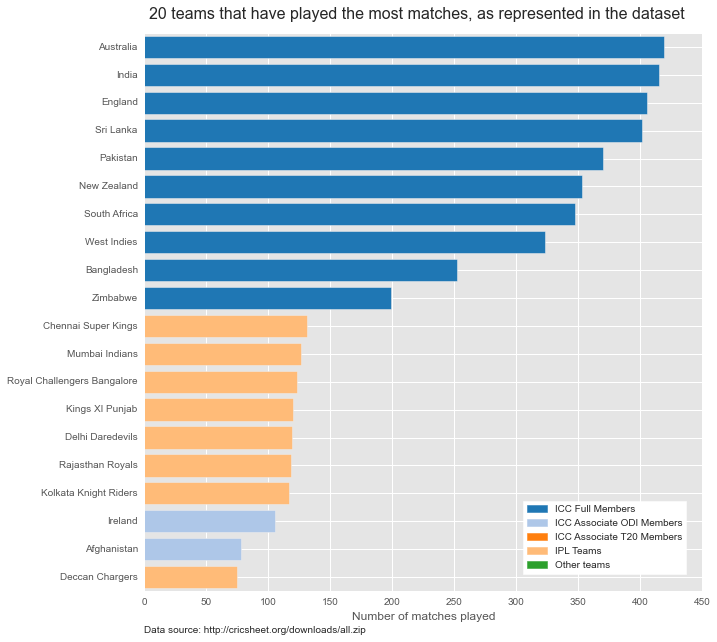

In [612]:
# Chart data
team_counter = Counter(total_teams).most_common()
team_keys = [x[0] for x in team_counter[:20]][::-1]
val = [x[1] for x in team_counter[:20]][::-1]
pos = np.arange(len(teamsdf.index)) + 0.5    # the bar centers on the y axis

# Group / color labelling
full_members = ['Australia', 'Bangladesh', 'England', 'India', 'New Zealand',
                'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwe']
assoc_odi = ['Afghanistan', 'Hong Kong', 'Ireland', 'Papua New Guinea', 'Scotland', 'United Arab Emirates']
assoc_t20 = ['Netherlands', 'Oman']
ipl_teams = ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 
             'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders',
             'Mumbai Indians', 'Pune Warriors India', 'Rajasthan Royals', 'Rising Pune Supergiants', 
             'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
           (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
           (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
           (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
           (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

colors = []
for team in team_keys:
    if team in full_members:
        colors.append(tableau20[0])
    elif team in assoc_odi:
        colors.append(tableau20[1])
    elif team in assoc_t20:
        colors.append(tableau20[2])
    elif team in ipl_teams:
        colors.append(tableau20[3])
    else:
        colors.append(tableau20[4])

# Plotting
plt.figure(figsize = (10, 10))    
ax = plt.subplot(111) 
ax.barh(pos, val, align = 'center', height = 0.8, color = colors)
                
# Chart title
plt.text(220, 20.5, "20 teams that have played the most matches, as represented in the dataset", 
         fontsize = 16, ha = "center")
plt.text(0, -1.5, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.yticks(pos, team_keys, fontsize = 10)
plt.xlabel('Number of matches played')

# Legend
full_mem = mpatches.Patch(color = tableau20[0], label = 'ICC Full Members')
odi_mem = mpatches.Patch(color = tableau20[1], label = 'ICC Associate ODI Members')
t20_mem = mpatches.Patch(color = tableau20[2], label = 'ICC Associate T20 Members')
ipl_mem = mpatches.Patch(color = tableau20[3], label = 'IPL Teams')
others = mpatches.Patch(color = tableau20[4], label = 'Other teams')
legend = ax.legend(bbox_to_anchor = [0.98, 0.17], handles = [full_mem, odi_mem, t20_mem, ipl_mem, others],
                   frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()

So the 10 Full Members of the ICC play significantly more matches than any of the other teams, with most of the IPL teams following. If we look more closely at the 10 Full Members, we can see the breakdown of the types of matches they play. 

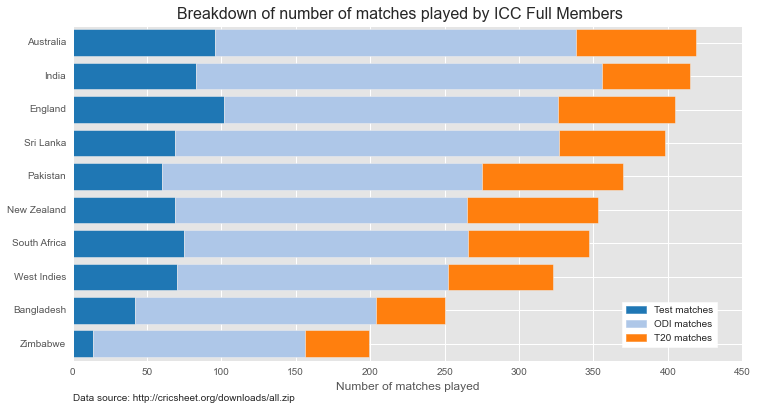

In [549]:
test_teams = cricket_df[cricket_df["Match Type"] == "Test"]["Team 1"].append(
             cricket_df[cricket_df["Match Type"] == "Test"]["Team 2"])
odi_teams = cricket_df[cricket_df["Match Type"] == "ODI"]["Team 1"].append(
            cricket_df[cricket_df["Match Type"] == "ODI"]["Team 2"])
t20_teams = cricket_df[cricket_df["Match Type"] == "T20"]["Team 1"].append(
            cricket_df[cricket_df["Match Type"] == "T20"]["Team 2"])
test_counter = Counter(test_teams)
odi_counter = Counter(odi_teams)
t20_counter = Counter(t20_teams)

test_count = []
odi_count = []
t20_count = []
for team in team_keys:
    for key, value in test_counter.iteritems():
        if key == team:
            test_count.append(value)
        else:
            pass
    for key, value in odi_counter.iteritems():
        if key == team:
            odi_count.append(value)
        else:
            pass
    for key, value in t20_counter.iteritems():
        if key == team:
            t20_count.append(value)
        else:
            pass

team_keys = [x[0] for x in team_counter[:10]][::-1]
pos = np.arange(len(team_keys)) + 0.5

plt.figure(figsize = (12, 6))    
ax = plt.subplot(111) 
ax.barh(pos, test_count, align = 'center', height = 0.8, color = tableau20[0])
ax.barh(pos, odi_count, left = [test_count[i] for i in range(10)], 
        align = 'center', height = 0.8, color = tableau20[1])
ax.barh(pos, t20_count, left = [test_count[i] + odi_count[i] for i in range(10)], 
        align = 'center', height = 0.8, color = tableau20[2])

# Chart title
plt.text(220, 10.2, "Breakdown of number of matches played by ICC Full Members", 
         fontsize = 16, ha = "center")
plt.text(0, -1.2, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.yticks(pos, team_keys, fontsize = 10)
plt.xlabel('Number of matches played')

# Legend
test_m = mpatches.Patch(color = tableau20[0], label = 'Test matches')
odi_m = mpatches.Patch(color = tableau20[1], label = 'ODI matches')
t20_m = mpatches.Patch(color = tableau20[2], label = 'T20 matches')
legend = ax.legend(bbox_to_anchor = [0.97, 0.19], handles = [test_m, odi_m, t20_m], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()

So the Full Members are playing a higher *number* of ODI matches, but once again considering the number of days played, the plot below shows that Full Members generally spend more time playing Test matches. 

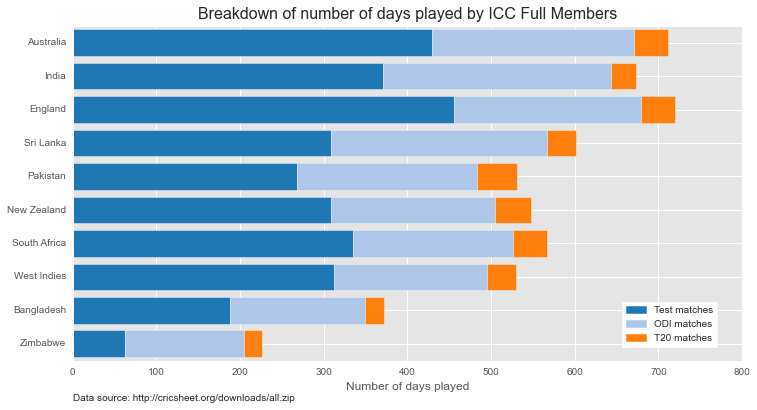

In [550]:
test_count = [x * ave_test_length for x in test_count]
t20_count = [x * 0.5 for x in t20_count]

plt.figure(figsize = (12, 6))    
ax = plt.subplot(111) 
ax.barh(pos, test_count, align = 'center', height = 0.8, color = tableau20[0])
ax.barh(pos, odi_count, left = [test_count[i] for i in range(10)], 
        align = 'center', height = 0.8, color = tableau20[1])
ax.barh(pos, t20_count, left = [test_count[i] + odi_count[i] for i in range(10)], 
        align = 'center', height = 0.8, color = tableau20[2])

# Chart title
plt.text(400, 10.2, "Breakdown of number of days played by ICC Full Members", 
         fontsize = 16, ha = "center")
plt.text(0, -1.2, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.yticks(pos, team_keys, fontsize = 10)
plt.xlabel('Number of days played')

# Legend
test_m = mpatches.Patch(color = tableau20[0], label = 'Test matches')
odi_m = mpatches.Patch(color = tableau20[1], label = 'ODI matches')
t20_m = mpatches.Patch(color = tableau20[2], label = 'T20 matches')
legend = ax.legend(bbox_to_anchor = [0.97, 0.19], handles = [test_m, odi_m, t20_m], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()

## 2.4. Venues holding the most matches
Similarly, some venues hold more matches than others. Let's look at the 20 venues which have held the most matches.


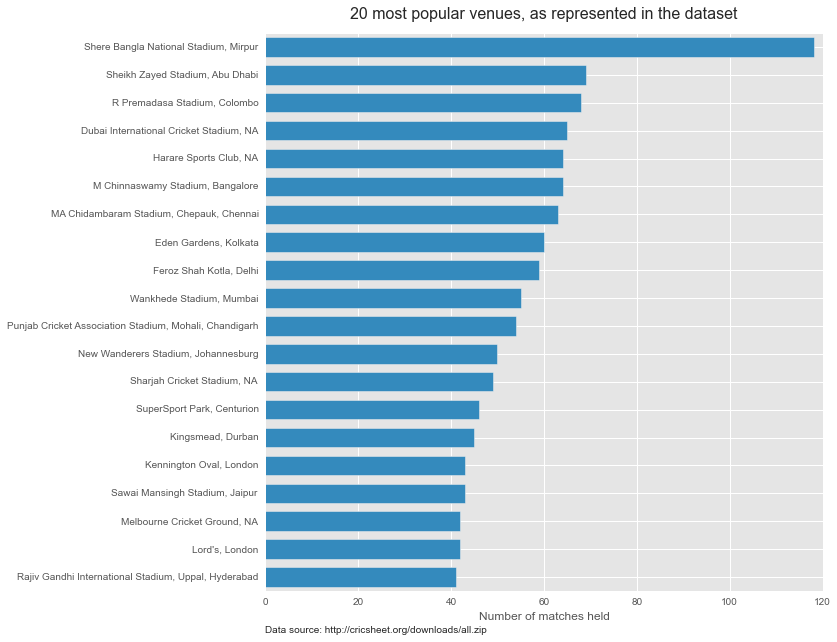

In [613]:
venue_counter = Counter(cricket_df["Venue, City"]).most_common()

# Chart data
venue_keys = [x[0] for x in venue_counter[:20]][::-1]
val = [x[1] for x in venue_counter[:20]][::-1]   # the bar lengths
pos = np.arange(len(venuedf.index)) + 0.5    # the bar centers on the y axis

plt.figure(figsize = (10, 10))    
ax = plt.subplot(111) 
ax.barh(pos, val, align = 'center', height = 0.7)
                
# Chart title
plt.text(60, 20.5, "20 most popular venues, as represented in the dataset", fontsize = 16, ha = "center")
plt.text(0, -1.5, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.yticks(pos, venue_keys, fontsize = 10)
plt.xlabel('Number of matches held')

plt.show()

One venue, 'Shere Bangla National Stadium, Mirpur', has held significantly more matches than any of the other venues. This venue is in Bangladesh and depending on whether all these matches included Bangladesh as one of the playing teams, suggests that the Bangladesh team does not play a large number of matches outside of their own country. (costs?)

It is noted that many of the venues in the plot above are located in India, which is expected to be caused by the fact that all IPL matches are held in India. So, if we looked at status matches only, how does this plot change? 


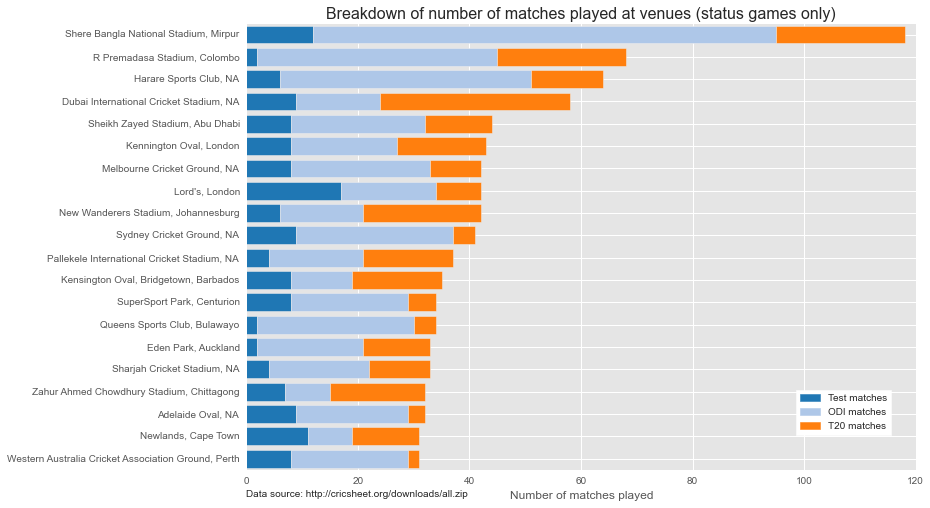

In [618]:
status_venues = cricket_df[cricket_df["Match Type"] == "Test"]["Venue, City"].append(
    cricket_df[cricket_df["Match Type"] == "ODI"]["Venue, City"]).append(
    cricket_df[cricket_df["Match Type"] == "T20"]["Venue, City"])
venue_counter = Counter(status_venues).most_common()
venue_keys = [x[0] for x in venue_counter[:20]][::-1]

test_venues = cricket_df[cricket_df["Match Type"] == "Test"]["Venue, City"]
odi_venues = cricket_df[cricket_df["Match Type"] == "ODI"]["Venue, City"]
t20_venues = cricket_df[cricket_df["Match Type"] == "T20"]["Venue, City"]
test_ven_counter = Counter(test_venues)
odi_ven_counter = Counter(odi_venues)
t20_ven_counter = Counter(t20_venues)

test_ven_count = []
odi_ven_count = []
t20_ven_count = []
for venue in venue_keys:
    for key, value in test_ven_counter.iteritems():
        if key == venue:
            test_ven_count.append(value)
        else:
            pass
    for key, value in odi_ven_counter.iteritems():
        if key == venue:
            odi_ven_count.append(value)
        else:
            pass
    for key, value in t20_ven_counter.iteritems():
        if key == venue:
            t20_ven_count.append(value)
        else:
            pass

venue_keys = [x[0] for x in venue_counter[:20]][::-1]
pos = np.arange(len(venue_keys)) + 0.5

plt.figure(figsize = (12, 8))    
ax = plt.subplot(111) 
ax.barh(pos, test_ven_count, align = 'center', height = 0.8, color = tableau20[0])
ax.barh(pos, odi_ven_count, left = [test_ven_count[i] for i in range(20)], 
        align = 'center', height = 0.8, color = tableau20[1])
ax.barh(pos, t20_ven_count, left = [test_ven_count[i] + odi_ven_count[i] for i in range(20)], 
        align = 'center', height = 0.8, color = tableau20[2])

# Chart title
plt.text(60, 20.2, "Breakdown of number of matches played at venues (status games only)", 
         fontsize = 16, ha = "center")
plt.text(0, -1.2, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.yticks(pos, venue_keys, fontsize = 10)
plt.xlabel('Number of matches played')

# Legend
test_m = mpatches.Patch(color = tableau20[0], label = 'Test matches')
odi_m = mpatches.Patch(color = tableau20[1], label = 'ODI matches')
t20_m = mpatches.Patch(color = tableau20[2], label = 'T20 matches')
legend = ax.legend(bbox_to_anchor = [0.97, 0.19], handles = [test_m, odi_m, t20_m], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()


Are all these venues in Full Member countries? Or do they play in other locations too? Note Abu Dhabi - UAE cannot play test matches, but test matches are played in the country, so other teams must play there (why, I'm not sure).

In [621]:
cricket_df[(cricket_df['Match Type'] == 'Test') & (cricket_df['Venue, City'] == 'Sheikh Zayed Stadium, Abu Dhabi')]

,Match Type,Starting Date,No. of days,"Venue, City",Team 1,Team 2,Winner
1035,Test,2010-11-20,5,"Sheikh Zayed Stadium, Abu Dhabi",Pakistan,South Africa,draw
1307,Test,2011-10-18,5,"Sheikh Zayed Stadium, Abu Dhabi",Pakistan,Sri Lanka,draw
1317,Test,2012-01-25,4,"Sheikh Zayed Stadium, Abu Dhabi",England,Pakistan,Pakistan
1852,Test,2013-10-14,4,"Sheikh Zayed Stadium, Abu Dhabi",Pakistan,South Africa,Pakistan
1917,Test,2013-12-31,5,"Sheikh Zayed Stadium, Abu Dhabi",Pakistan,Sri Lanka,draw
2132,Test,2014-10-30,5,"Sheikh Zayed Stadium, Abu Dhabi",Australia,Pakistan,Pakistan
2235,Test,2014-11-09,5,"Sheikh Zayed Stadium, Abu Dhabi",New Zealand,Pakistan,Pakistan
2600,Test,2015-10-13,5,"Sheikh Zayed Stadium, Abu Dhabi",England,Pakistan,draw


In [624]:
cricket_df[(cricket_df['Venue, City'] == 'Shere Bangla National Stadium, Mirpur') & 
          (cricket_df['Team 1'] != 'Bangladesh')]

,Match Type,Starting Date,No. of days,"Venue, City",Team 1,Team 2,Winner
440,ODI,2008-06-10,1,"Shere Bangla National Stadium, Mirpur",India,Pakistan,India
442,ODI,2008-06-14,1,"Shere Bangla National Stadium, Mirpur",India,Pakistan,Pakistan
938,ODI,2011-03-23,1,"Shere Bangla National Stadium, Mirpur",Pakistan,West Indies,Pakistan
940,ODI,2011-03-25,1,"Shere Bangla National Stadium, Mirpur",New Zealand,South Africa,New Zealand
948,ODI,2010-01-05,1,"Shere Bangla National Stadium, Mirpur",India,Sri Lanka,Sri Lanka
951,ODI,2010-01-10,1,"Shere Bangla National Stadium, Mirpur",India,Sri Lanka,India
953,ODI,2010-01-13,1,"Shere Bangla National Stadium, Mirpur",India,Sri Lanka,Sri Lanka
1382,ODI,2012-03-13,1,"Shere Bangla National Stadium, Mirpur",India,Sri Lanka,India
1383,ODI,2012-03-15,1,"Shere Bangla National Stadium, Mirpur",Pakistan,Sri Lanka,Pakistan
1385,ODI,2012-03-18,1,"Shere Bangla National Stadium, Mirpur",India,Pakistan,India


Look at number of days played.

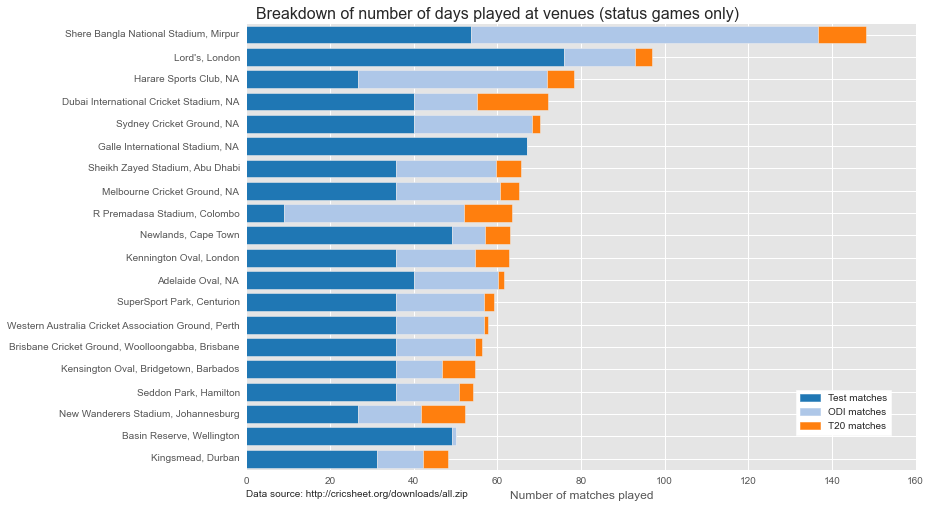

In [611]:
test_venues = cricket_df[cricket_df["Match Type"] == "Test"]["Venue, City"]
odi_venues = cricket_df[cricket_df["Match Type"] == "ODI"]["Venue, City"]
t20_venues = cricket_df[cricket_df["Match Type"] == "T20"]["Venue, City"]

test_ven_counter = Counter(test_venues).items()
odi_ven_counter = Counter(odi_venues).items()
t20_ven_counter = Counter(t20_venues).items()

venue_list = [x[0] for x in venue_counter]
count = [0] * len(venue_list)
plot_df = pd.DataFrame(data = count, index = venue_list, columns = ["Count"])

for venue in venue_list:
    for key, value in test_ven_counter:
        if key == venue:
            plot_df.ix[venue, "Count"] += (value * ave_test_length)
        else:
            pass
    for key, value in odi_ven_counter:
        if key == venue:
            plot_df.ix[venue, "Count"] += value
        else:
            pass
    for key, value in t20_ven_counter:
        if key == venue:
            plot_df.ix[venue, "Count"] += (value * 0.5)
        else:
            pass

plot_df = plot_df.sort_values(by = "Count")
venue_list = plot_df.index.values[-20:]
pos = np.arange(len(venue_list)) + 0.5

test_ven_count = []
odi_ven_count = []
t20_ven_count = []
for venue in venue_list:
    check_1 = [i[1] for i in test_ven_counter if i[0] == venue]
    check_2 = [i[1] for i in odi_ven_counter if i[0] == venue]
    check_3 = [i[1] for i in t20_ven_counter if i[0] == venue]
    if not check_1:
        test_ven_count.append(0)
    if not check_2:
        odi_ven_count.append(0)
    if not check_3:
        t20_ven_count.append(0)
    for key, value in test_ven_counter:
        if key == venue:
            test_ven_count.append(value * ave_test_length)
        else:
            pass
    for key, value in odi_ven_counter:
        if key == venue:
            odi_ven_count.append(value)
        else:
            pass
    for key, value in t20_ven_counter:
        if key == venue:
            t20_ven_count.append(value * 0.5)
        else:
            pass

plt.figure(figsize = (12, 8))    
ax = plt.subplot(111) 
ax.barh(pos, test_ven_count, align = 'center', height = 0.8, color = tableau20[0])
ax.barh(pos, odi_ven_count, left = [test_ven_count[i] for i in range(20)], 
        align = 'center', height = 0.8, color = tableau20[1])
ax.barh(pos, t20_ven_count, left = [test_ven_count[i] + odi_ven_count[i] for i in range(20)], 
        align = 'center', height = 0.8, color = tableau20[2])

# Chart title
plt.text(60, 20.2, "Breakdown of number of days played at venues (status games only)", 
         fontsize = 16, ha = "center")
plt.text(0, -1.2, "Data source: http://cricsheet.org/downloads/all.zip", fontsize = 10)
plt.yticks(pos, venue_list, fontsize = 10)
plt.xlabel('Number of matches played')

# Legend
test_m = mpatches.Patch(color = tableau20[0], label = 'Test matches')
odi_m = mpatches.Patch(color = tableau20[1], label = 'ODI matches')
t20_m = mpatches.Patch(color = tableau20[2], label = 'T20 matches')
legend = ax.legend(bbox_to_anchor = [0.97, 0.19], handles = [test_m, odi_m, t20_m], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()